<a href="https://colab.research.google.com/github/Daksh-Dhaker/Neural-Networks/blob/main/Recurrent_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.linspace(0,50,501)

In [4]:
y = np.sin(x)

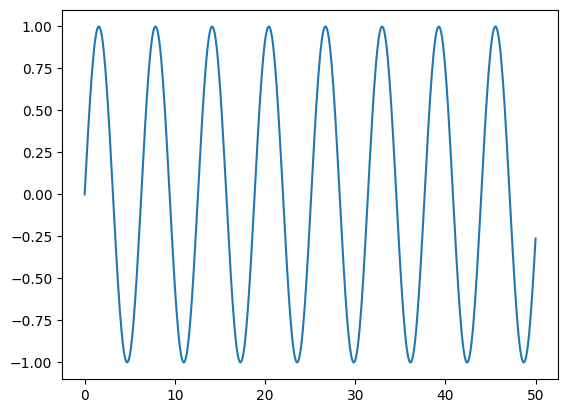

In [5]:
plt.plot(x,y)

In [6]:
df = pd.DataFrame(data = y,index = x,columns =['Sine'])

In [8]:
# Test Train split (What % end is used for testing)
test_percent = 0.1
test_point = np.round(len(df)*test_percent)

In [9]:
test_ind = int(len(df)-test_point)

In [10]:
train = df.iloc[:test_ind]

In [11]:
test = df.iloc[test_ind:]

In [13]:
# Scaling the Data
#Here we have to scale the label
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
scaled_train = scaler.fit_transform(train)

In [16]:
scaled_test = scaler.transform(test)

In [17]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [28]:
#Batch-Generator (Time-series generator)
length = 50
batch_size = 1
generator = TimeseriesGenerator(scaled_train,scaled_train,length = length,batch_size = batch_size)

In [29]:
#Here length =2 means pass two vales of series predict the third value
X,y = generator[0]

In [30]:
X

array([[[4.99999116e-01],
        [5.49916225e-01],
        [5.99334579e-01],
        [6.47760405e-01],
        [6.94709850e-01],
        [7.39713809e-01],
        [7.82322618e-01],
        [8.22110545e-01],
        [8.58680040e-01],
        [8.91665714e-01],
        [9.20737985e-01],
        [9.45606372e-01],
        [9.66022399e-01],
        [9.81782075e-01],
        [9.92727935e-01],
        [9.98750612e-01],
        [9.99789928e-01],
        [9.95835500e-01],
        [9.86926839e-01],
        [9.73152957e-01],
        [9.54651478e-01],
        [9.31607263e-01],
        [9.04250562e-01],
        [8.72854714e-01],
        [8.37733417e-01],
        [7.99237589e-01],
        [7.57751870e-01],
        [7.13690771e-01],
        [6.67494535e-01],
        [6.19624741e-01],
        [5.70559686e-01],
        [5.20789614e-01],
        [4.70811810e-01],
        [4.21125636e-01],
        [3.72227539e-01],
        [3.24606094e-01],
        [2.78737119e-01],
        [2.35078919e-01],
        [1.9

In [31]:
y

array([[0.02053313]])

In [32]:
scaled_train

array([[4.99999116e-01],
       [5.49916225e-01],
       [5.99334579e-01],
       [6.47760405e-01],
       [6.94709850e-01],
       [7.39713809e-01],
       [7.82322618e-01],
       [8.22110545e-01],
       [8.58680040e-01],
       [8.91665714e-01],
       [9.20737985e-01],
       [9.45606372e-01],
       [9.66022399e-01],
       [9.81782075e-01],
       [9.92727935e-01],
       [9.98750612e-01],
       [9.99789928e-01],
       [9.95835500e-01],
       [9.86926839e-01],
       [9.73152957e-01],
       [9.54651478e-01],
       [9.31607263e-01],
       [9.04250562e-01],
       [8.72854714e-01],
       [8.37733417e-01],
       [7.99237589e-01],
       [7.57751870e-01],
       [7.13690771e-01],
       [6.67494535e-01],
       [6.19624741e-01],
       [5.70559686e-01],
       [5.20789614e-01],
       [4.70811810e-01],
       [4.21125636e-01],
       [3.72227539e-01],
       [3.24606094e-01],
       [2.78737119e-01],
       [2.35078919e-01],
       [1.94067715e-01],
       [1.56113277e-01],


In [33]:
# Here y is the 26th value after 25 values of X
#Creating the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM

In [34]:
n_features = 1

In [35]:
model = Sequential()

model.add(SimpleRNN(50,input_shape = (length,n_features)))

model.add(Dense(1))
model.compile(optimizer ='adam',loss ='mse')

In [36]:
model.fit_generator(generator,epochs =5)

Epoch 1/5


<ipython-input-36-40e4cad5b3a7>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs =5)


401/401 [==============================] - 6s 9ms/step - loss: 0.0072
Epoch 2/5
401/401 [==============================] - 3s 8ms/step - loss: 2.5641e-04
Epoch 3/5
401/401 [==============================] - 5s 11ms/step - loss: 3.7844e-05
Epoch 4/5
401/401 [==============================] - 3s 8ms/step - loss: 2.8095e-04
Epoch 5/5
401/401 [==============================] - 3s 8ms/step - loss: 1.8445e-04


In [37]:
losses = pd.DataFrame(model.history.history)

<Axes: >

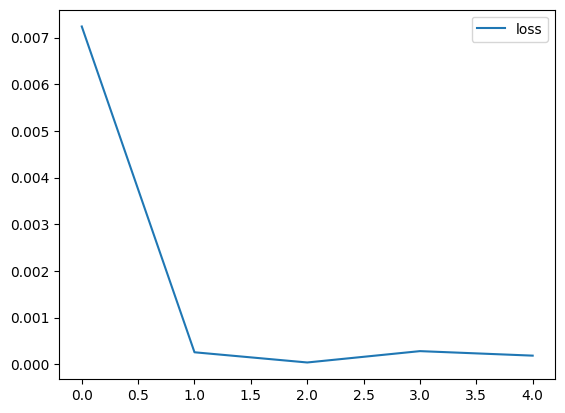

In [38]:
losses.plot()

In [39]:
#Validation into a test_data
#first point evaluation
first_eval_batch = scaled_train[-length:]

In [40]:
first_eval_batch = first_eval_batch.reshape((1,length,n_features))

In [41]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 252ms/step


array([[0.94785887]], dtype=float32)

In [42]:
scaled_test[0]

array([0.94955134])

In [43]:
# Predicting into infinte future
test_predictions =[]
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

In [44]:

# np.append(current_batch[:,1:,:]) # Appending one point at last and deleting a point from start

In [45]:
test_predictions =[]
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]
  test_predictions.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis =1)

1/1 [==============================] - 0s 22ms/step


In [46]:
test_predictions

[array([0.94785887], dtype=float32),
 array([0.9677071], dtype=float32),
 array([0.98192513], dtype=float32),
 array([0.9909509], dtype=float32),
 array([0.99499613], dtype=float32),
 array([0.99343085], dtype=float32),
 array([0.98707736], dtype=float32),
 array([0.97553146], dtype=float32),
 array([0.9588062], dtype=float32),
 array([0.93684447], dtype=float32),
 array([0.9107572], dtype=float32),
 array([0.8800222], dtype=float32),
 array([0.8452602], dtype=float32),
 array([0.8069784], dtype=float32),
 array([0.76487046], dtype=float32),
 array([0.7203058], dtype=float32),
 array([0.6729051], dtype=float32),
 array([0.62323695], dtype=float32),
 array([0.57176775], dtype=float32),
 array([0.5185514], dtype=float32),
 array([0.46438047], dtype=float32),
 array([0.40944222], dtype=float32),
 array([0.35425147], dtype=float32),
 array([0.2993589], dtype=float32),
 array([0.2459066], dtype=float32),
 array([0.19398682], dtype=float32),
 array([0.14494118], dtype=float32),
 array([0.099

In [47]:
true_predictions = scaler.inverse_transform(test_predictions)

In [49]:
test['Predictons'] = true_predictions

<ipython-input-49-ef658c67633f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictons'] = true_predictions


<Axes: >

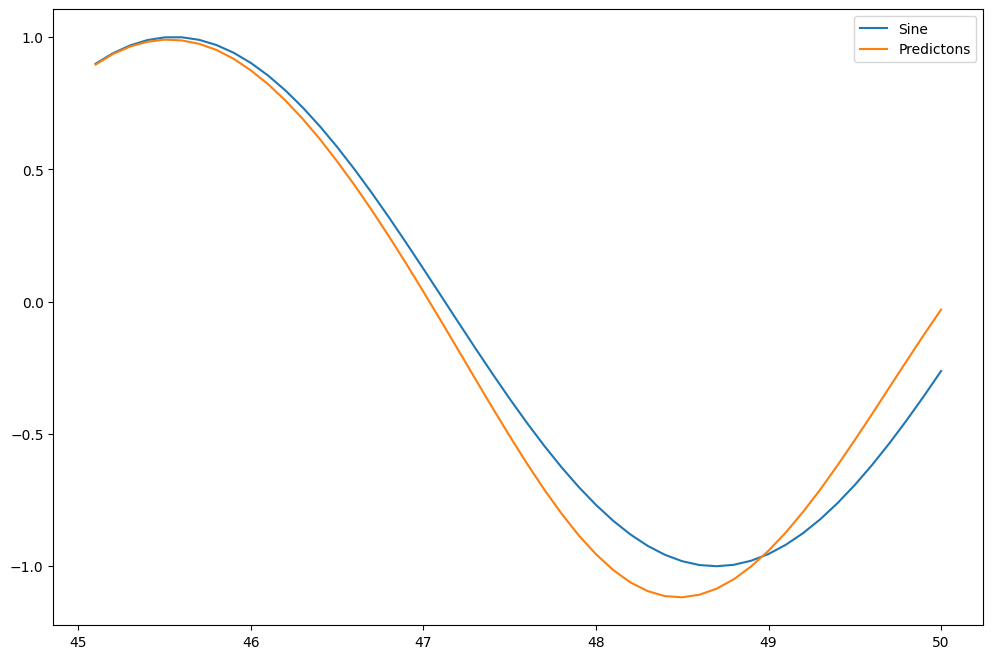

In [51]:
test.plot(figsize =(12,8))

In [52]:
# using LSTMs to improve the performance
#Also using early stopping
from tensorflow.keras.callbacks import EarlyStopping

In [62]:
early_stop = EarlyStopping(monitor ='val_loss',patience =2)

In [63]:
#creating validation generator
length = 49
generator = TimeseriesGenerator(scaled_train,scaled_train,length =length,batch_size =1)

validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length = length,batch_size =1)

In [64]:
model2 = Sequential()

model2.add(LSTM(50,input_shape =(length,n_features)))

model2.add(Dense(1))

model2.compile(optimizer ='adam',loss ='mse')

In [65]:
model2.fit_generator(generator,epochs =20,validation_data = validation_generator,callbacks = [early_stop])

Epoch 1/20


<ipython-input-65-5a5fa519e1a2>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model2.fit_generator(generator,epochs =20,validation_data = validation_generator,callbacks = [early_stop])


402/402 [==============================] - 11s 21ms/step - loss: 0.0103 - val_loss: 2.1342e-05
Epoch 2/20
402/402 [==============================] - 8s 20ms/step - loss: 2.1563e-04 - val_loss: 7.4823e-05
Epoch 3/20
402/402 [==============================] - 7s 18ms/step - loss: 9.5409e-05 - val_loss: 1.3934e-05
Epoch 4/20
402/402 [==============================] - 8s 20ms/step - loss: 1.6446e-04 - val_loss: 2.8618e-05
Epoch 5/20
402/402 [==============================] - 7s 18ms/step - loss: 2.0229e-04 - val_loss: 2.9149e-07
Epoch 6/20
402/402 [==============================] - 7s 18ms/step - loss: 4.2527e-05 - val_loss: 4.8380e-05
Epoch 7/20
402/402 [==============================] - 7s 18ms/step - loss: 9.7284e-04 - val_loss: 2.4396e-04


In [66]:
test_predictions =[]
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]
  test_predictions.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis =1)

1/1 [==============================] - 0s 24ms/step


<ipython-input-67-88d160ba662d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictons'] = true_predictions


<Axes: >

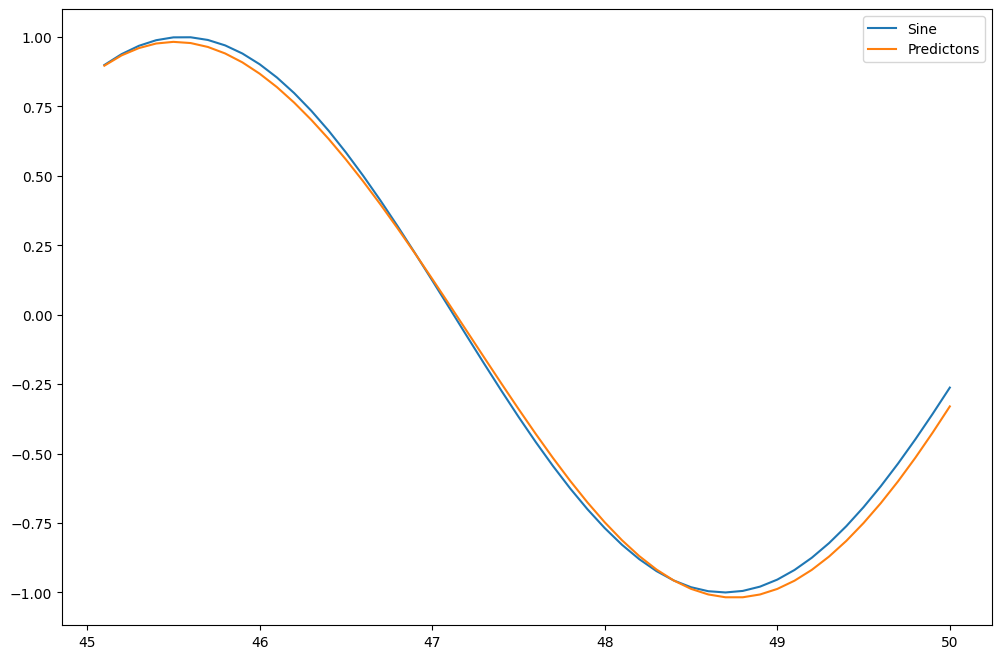

In [67]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictons'] = true_predictions
test.plot(figsize =(12,8))

In [68]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [69]:
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,length = length,batch_size =1)

In [70]:
model2 = Sequential()

model2.add(LSTM(50,input_shape =(length,n_features)))

model2.add(Dense(1))

model2.compile(optimizer ='adam',loss ='mse')

In [71]:
model2.fit_generator(generator,epochs =7,)

Epoch 1/7


<ipython-input-71-efe51f257a66>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model2.fit_generator(generator,epochs =7,)


452/452 [==============================] - 11s 18ms/step - loss: 0.0085
Epoch 2/7
452/452 [==============================] - 9s 20ms/step - loss: 1.0685e-04
Epoch 3/7
452/452 [==============================] - 9s 19ms/step - loss: 3.1099e-04
Epoch 4/7
452/452 [==============================] - 8s 18ms/step - loss: 2.1394e-04
Epoch 5/7
452/452 [==============================] - 9s 20ms/step - loss: 2.5914e-04
Epoch 6/7
452/452 [==============================] - 9s 19ms/step - loss: 9.3765e-05
Epoch 7/7
452/452 [==============================] - 8s 18ms/step - loss: 5.3080e-05


In [73]:
forecast =[]
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(25):
  current_pred = model.predict(current_batch)[0]
  forecast.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis =1)

1/1 [==============================] - 0s 32ms/step


In [74]:
forecast = full_scaler.inverse_transform(forecast)

In [78]:
forecast_ind = np.arange(50.1,52.6,step = 0.1)

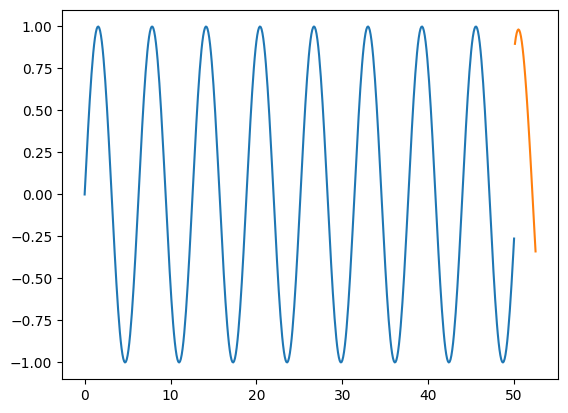

In [79]:
plt.plot(df.index,df['Sine'])
plt.plot(forecast_ind,forecast)